### Pattern detection in minute trade data
The hypotheis is that there are hidden patterns nestled among the stock market minutely time series data.  It stands to reason that with 70% of the trading being performed by machine that there should exhibit some consistent patterns.  I am curious to know whether these rules will manifest themselves as recurring patterns which can be extracted from historical data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib
from datetime import datetime

In [2]:
#load some sample data
temp1 = pd.read_csv("C:\\Users\\steve\\Documents\\Visual Studio 2017\\Projects\\PythonApplication1\\PythonApplication1\\NVDA_20181228_1min_3.csv")
temp2 = pd.read_csv("C:\\Users\\steve\\Documents\\Visual Studio 2017\\Projects\\PythonApplication1\\PythonApplication1\\NVDA_20190115_1min.csv")

#
print("File1 has {0} samples".format(temp1.size))
print("File2 has {0} samples".format(temp2.size))

#Merge while excluding duplicates
ts=temp1.append(temp2, ignore_index=True)

print("Merged has {0} samples".format(ts.size))

ts.drop_duplicates(inplace=True)

print("Deduped has {0} samples".format(ts.size))

#Create a new index to remove the gaps made by any overlapping data in csv.
index = pd.Index(range(0,len(ts)))
ts = ts.set_index(index, drop=True)


File1 has 22680 samples
File2 has 23400 samples
Merged has 46080 samples
Deduped has 43740 samples


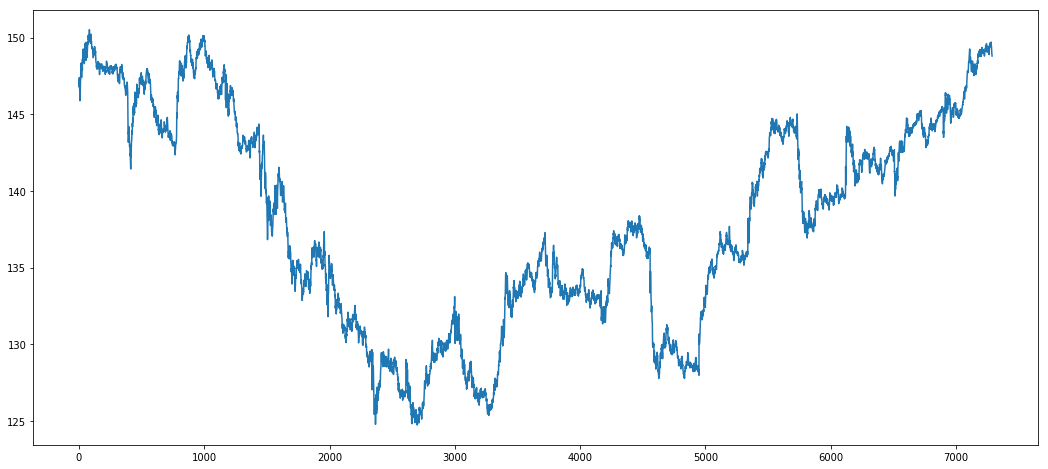

In [3]:
fig1, ax1 = plt.subplots(figsize=(18,8))
ts['close'].plot()

In [4]:
#Normalize the close price to be a percentage change, call it close_pct
ts['close_pct']  = ts['close']/ ts['close'].shift(1)

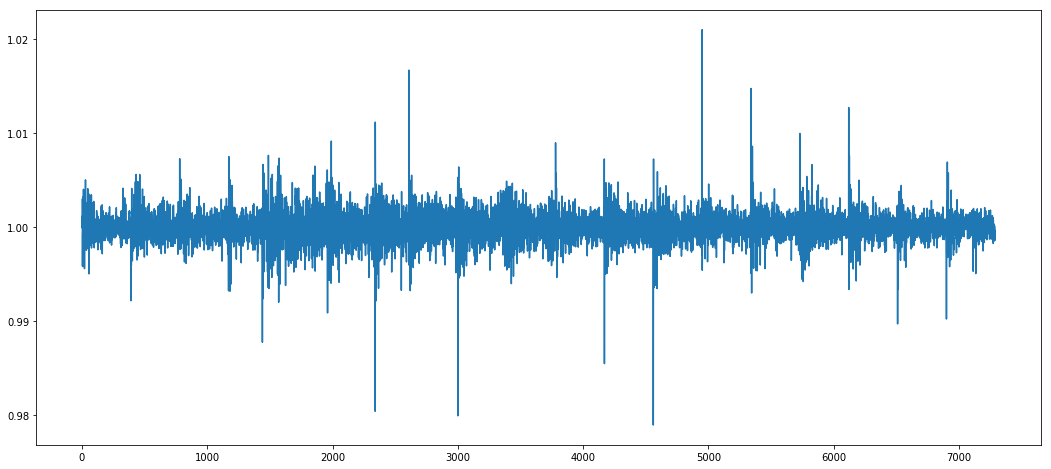

In [5]:
fig1, ax1 = plt.subplots(figsize=(18,8))
ts['close_pct'].plot()

In [6]:
ts['close_pct'].describe()

count    7289.000000
mean        1.000003
std         0.001758
min         0.978931
25%         0.999055
50%         1.000000
75%         1.000931
max         1.021017
Name: close_pct, dtype: float64

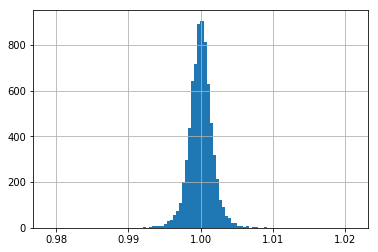

In [7]:
#Lets define a distribution which will evenly distribute these percents
ts['close_pct'].hist(bins=100)

C:\Program Files\Anaconda2\envs\python3.3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


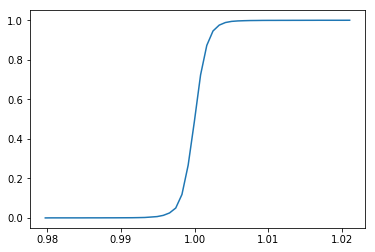

In [8]:
#we want to choose a set of bins such that the invert this histogram into N equally is equally distributed
#this is the cumulative distribution function

num_bins = 50
counts, bin_edges = np.histogram (ts['close_pct'].dropna(), bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])




In [9]:
#bin_edges[1:]
#Define 10 equal bin sizes between 0-1
equalbins = np.arange(0,1,.1)
#equalbins
qbins = np.quantile(a=ts['close_pct'].dropna(), q=equalbins)
qbins

array([0.97893114, 0.99813477, 0.99883644, 0.99928445, 0.99968809,
       1.        , 1.00034751, 1.00071896, 1.00118418, 1.00188434])

In [10]:
#now digitize using these bins
c = np.digitize(x=ts['close_pct'].dropna(), bins=qbins)
c

array([10,  5,  9, ...,  4,  4,  3], dtype=int64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026230F92240>]],
      dtype=object)

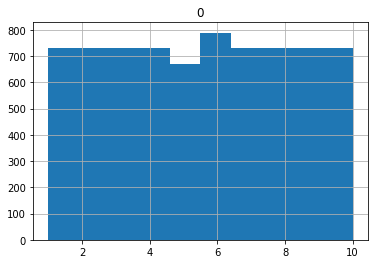

In [11]:
#evaluate the distribution of these, It should be an equal distribution
sax = pd.DataFrame(c)
#sax
#sax.describe()

#fig1, ax1 = plt.subplots(figsize=(18,8))
#sax.plot(ax=ax1)

sax.hist()

In [12]:
#Now create sequences of length w, to represent patterns.
import array 
w=3
sequences = []
patterns = []
pattern_ix = {}
#sax.rolling(window=3)

#Only store arrays of 8bit ints to save space
for i in range (0, sax.size - w):
    sequence = sax[i:i+w].values.flatten().astype('b')
    sequences.append(sequence)
    
    #lets create patterns as a string so we can hash it and use as a dictionary key later
    pattern = ''
    for j in np.arange(0,w):
        pattern += chr(sequence[j] + 64)
    patterns.append(pattern)
    
    #Create an inverted index of locations by pattern
    if (pattern not in pattern_ix):
        pattern_ix[pattern] = list()
        
    pattern_ix[pattern].append(i)


In [13]:
#patterns
#pattern_ix

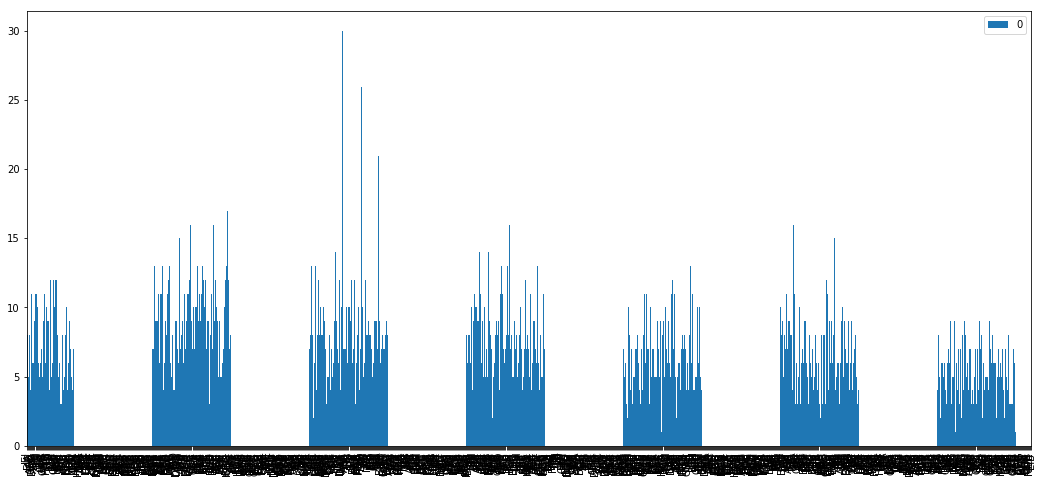

In [14]:
#Now lets crate a dictionary to evaluate frequency of sequences
from collections import Counter
frequencies = Counter(patterns)
df = pd.DataFrame.from_dict(frequencies, orient='index')

fig1, ax1 = plt.subplots(figsize=(18,8))
df.plot(kind='bar', ax=ax1)


In [15]:
#Lets examine our most frequent patterns
#osrt by values
#frequencies.values

import operator
frequencies_ordered = sorted(frequencies.items(), key=operator.itemgetter(1), reverse=True)
frequencies_ordered

[('AAA', 30),
 ('AJJ', 26),
 ('JJJ', 23),
 ('AAJ', 22),
 ('JBA', 21),
 ('HCD', 20),
 ('JAA', 18),
 ('FFF', 18),
 ('GGG', 17),
 ('AJB', 16),
 ('GGC', 16),
 ('DFE', 16),
 ('HFF', 16),
 ('JIA', 16),
 ('FGF', 16),
 ('BBH', 15),
 ('AJA', 15),
 ('EIF', 15),
 ('AIG', 15),
 ('EHD', 14),
 ('JAJ', 14),
 ('FBB', 14),
 ('FHF', 14),
 ('BAJ', 14),
 ('CHF', 14),
 ('ACA', 14),
 ('JDB', 14),
 ('JHA', 13),
 ('BEC', 13),
 ('HBB', 13),
 ('CHB', 13),
 ('FGG', 13),
 ('IFE', 13),
 ('EHF', 13),
 ('HGG', 13),
 ('CDH', 13),
 ('ICG', 13),
 ('CDD', 13),
 ('JGB', 13),
 ('JJC', 13),
 ('FEE', 13),
 ('BHF', 13),
 ('BIC', 13),
 ('CFF', 13),
 ('JJA', 13),
 ('JJB', 13),
 ('IFD', 13),
 ('IID', 13),
 ('AIF', 13),
 ('IFG', 13),
 ('IDA', 12),
 ('JCH', 12),
 ('HHF', 12),
 ('HFH', 12),
 ('DHD', 12),
 ('HDB', 12),
 ('DBH', 12),
 ('DFF', 12),
 ('FFD', 12),
 ('DBG', 12),
 ('DFG', 12),
 ('CGG', 12),
 ('HFC', 12),
 ('CFC', 12),
 ('BIG', 12),
 ('FHG', 12),
 ('GGF', 12),
 ('HDE', 12),
 ('DBJ', 12),
 ('FEH', 12),
 ('BJA', 12),
 ('HEA

In [16]:
#The other way to view this is using built in function
frequencies.most_common(20)

[('AAA', 30),
 ('AJJ', 26),
 ('JJJ', 23),
 ('AAJ', 22),
 ('JBA', 21),
 ('HCD', 20),
 ('JAA', 18),
 ('FFF', 18),
 ('GGG', 17),
 ('AJB', 16),
 ('GGC', 16),
 ('DFE', 16),
 ('HFF', 16),
 ('JIA', 16),
 ('FGF', 16),
 ('BBH', 15),
 ('AJA', 15),
 ('EIF', 15),
 ('AIG', 15),
 ('EHD', 14)]

In [17]:
#View the occurrences of pattern 'AAA'
pattern_ix['AAA']

[388,
 389,
 1172,
 1173,
 1479,
 1499,
 1500,
 1501,
 1502,
 1525,
 1526,
 1667,
 1721,
 1978,
 2344,
 2350,
 2373,
 2617,
 2622,
 2642,
 2821,
 3016,
 3046,
 3420,
 3421,
 3723,
 3822,
 4563,
 5733,
 5734]

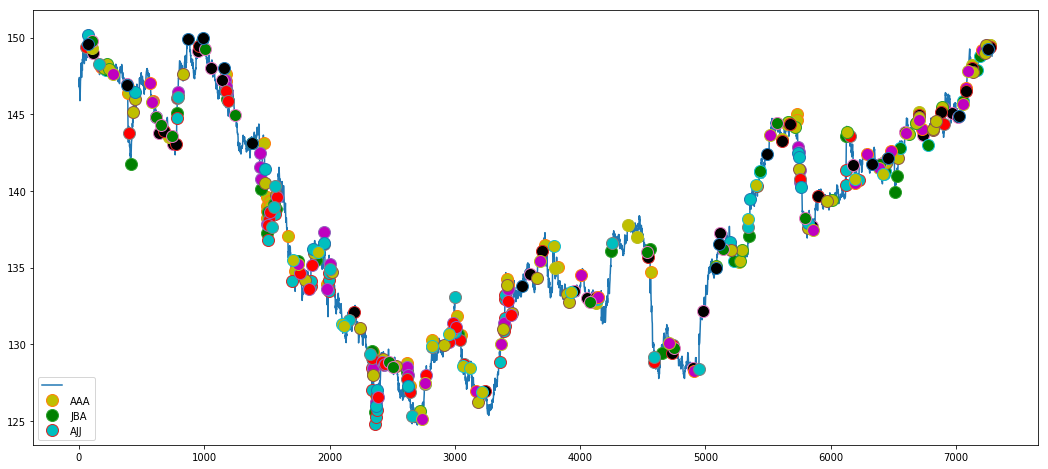

In [18]:
#I would like to visualize when each of these patterns occur in the data
fig1, ax1 = plt.subplots(figsize=(18,8))

#Make interactive
#%matplotlib qt

#Place markers at the location where 'AAA' was observed
colors = ('r', 'y', 'g', 'c', 'm', 'y', 'k')
cur_color=0
plt.plot(ts['close'])

for pattern in frequencies.most_common(20):
    cur_color += 1
    plt.plot(ts['close'], linestyle='None', marker='o', markevery=pattern_ix[pattern[0]], markersize=12, markerfacecolor=colors[cur_color % len(colors)])

#plt.plot(ts['close'], linestyle='None', marker='o', markevery=pattern_ix['JBA'], markersize=12, markerfacecolor=colors[1])
#plt.plot(ts['close'], linestyle='None', marker='o', markevery=pattern_ix['AJJ'], markersize=12, markerfacecolor=colors[2])

ax1.legend(['','AAA','JBA','AJJ'])
plt.show()

#%matplotlib inline 

In [19]:
[k[0] for k in frequencies.most_common(10)]

['AAA', 'AJJ', 'JJJ', 'AAJ', 'JBA', 'HCD', 'JAA', 'FFF', 'GGG', 'AJB']

In [20]:
ts['close_pct'].dropna().size


7289

In [21]:
#Create a function that returns the product of all price changes between a time range.
#Assumes series consists of relative price changes where 1.0 means no change.
def product_price(series, tstart, tend):
    product=1.0
    #if time end extends beyond the end of the series then truncate.
    if (tend > series.size):
        tend = series.size
    #If the start begins after the end of the series, this is not 
    if (tstart > series.size):
        return float('NaN')
    
    #Produce our product
    for t in range(tstart, tend+1):
        product *= series[t]
    
    return product

#product_price(ts['close_pct'].dropna(),3760,3779)

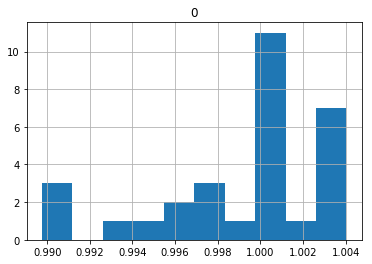

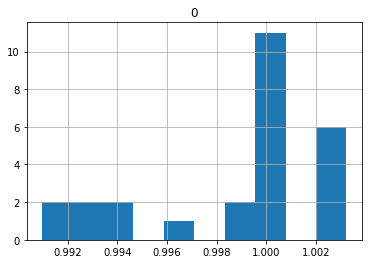

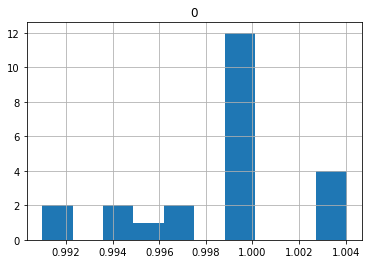

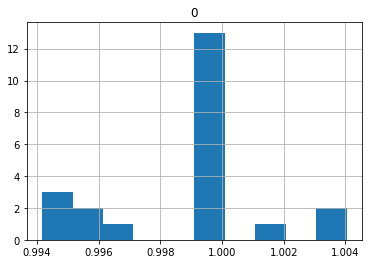

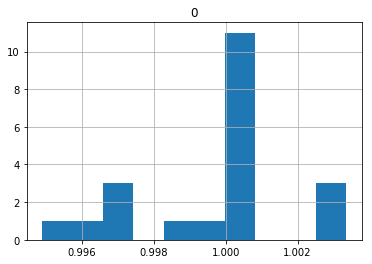

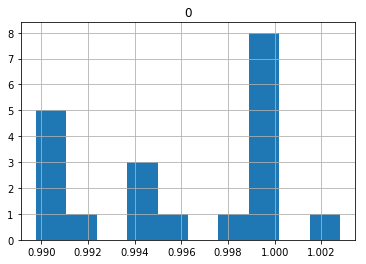

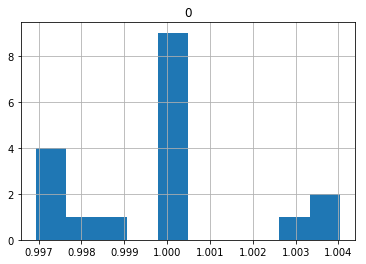

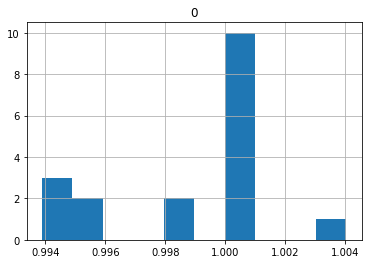

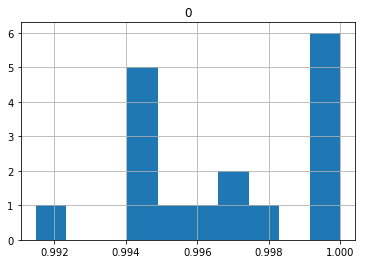

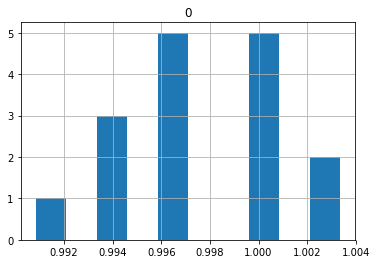

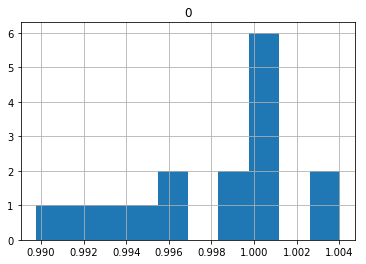

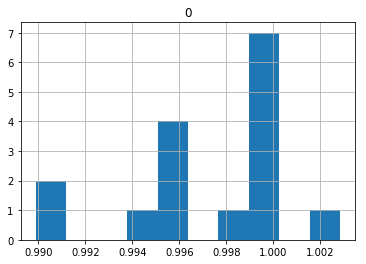

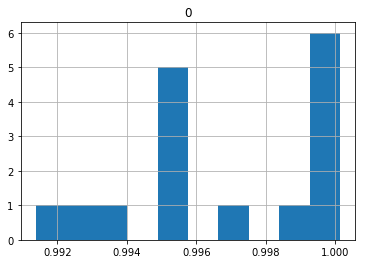

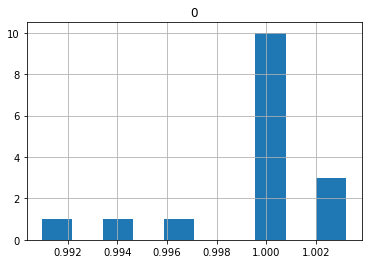

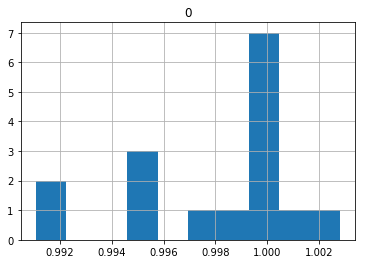

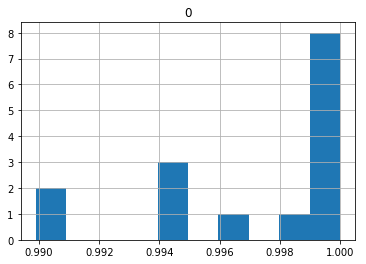

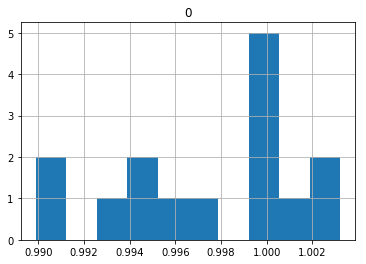

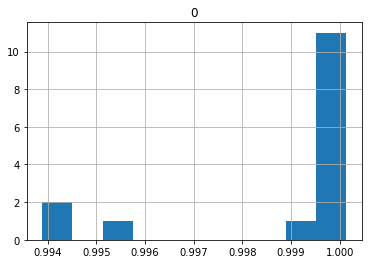

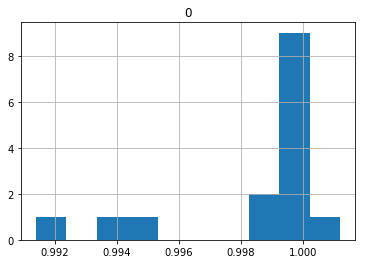

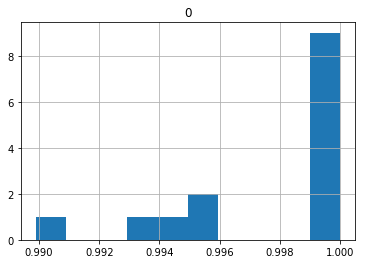

In [22]:
#Given the patterns which repeat themselves, does this give us any predticive power?
#How about 1 minute into the future?

#lets look at 'AAA'
#pattern_ix['AAA']

pattern_prob = {}

#Collect the value 1 minute in the future from all the samples where this pattern exists.

for k in frequencies.most_common(20):
    tplus1 = [sax.iloc[x+w][0] for x in pattern_ix[k[0]]]
    #pd.DataFrame(tplus1).hist()
    #tplus5 = [product_price(ts['close_pct'].dropna(), sax.iloc[x+w][0], sax.iloc[x+w+5][0]) for x in pattern_ix[k[0]]]
    #pd.DataFrame(tplus5).hist()
    tplus10 = [product_price(ts['close_pct'].dropna(), sax.iloc[x+w][0], sax.iloc[x+w+1][0]) for x in pattern_ix[k[0]]]
    pd.DataFrame(tplus10).hist()
    
    #Calculate the probability that upon observing pattern k, the return will be > 1.0x
    #at time t+1.
    pattern_prob[k[0]] = np.sum([pp for pp in tplus10 if pp >= 1.0]) / np.sum(tplus10)



In [23]:
#[product_price(ts['close_pct'].dropna(), sax.iloc[x+w][0], sax.iloc[x+w+10][0]) for x in pattern_ix['AAA']]

#[pp for pp in tplus10]

#ts['close_pct'].dropna()[1502: 1510]
#[product_price(ts['close_pct'].dropna(), x, x+3) for x in pattern_ix['AAA']]
#1502
#ts['close_pct'].dropna().size

#ts['close_pct'].dropna()[4700]

#[x for x in pattern_ix['AAA']]

In [24]:
#pattern_ix['AAA']
#sax.iloc[388+3]

#Trading on a minute level doesn't make sense from a fee viewpoint.
#But, lets say we observe a pattern, can we make a probabilitic guess the price will be higher/lower 
#10 minutes from now?

#We want a weighted probability, which is the sum of prices > 1 / sum of all prices.
#pattern_ix['AAA']
#pattern_prob

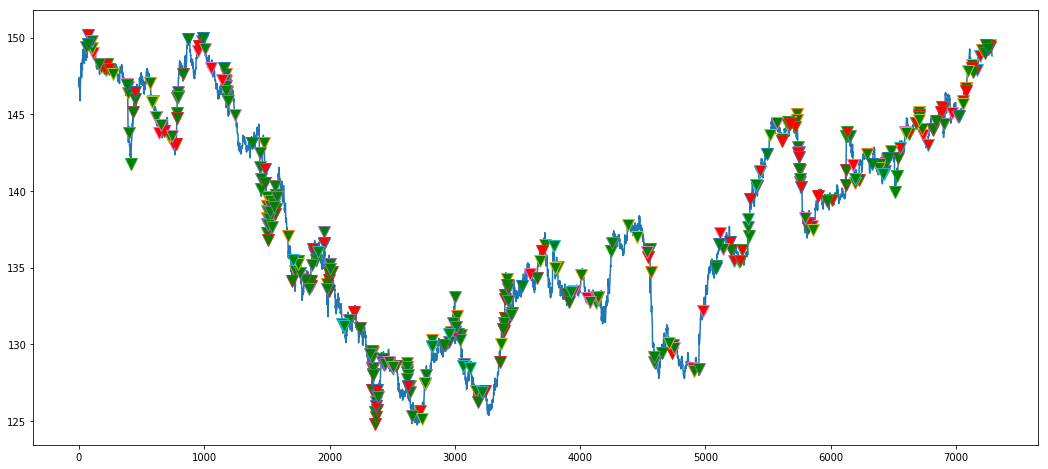

In [25]:
#Lets view a plot with every pattern which results in the price being higher 10 minutes after its observations.
#We will mark in green
#Make interactive
#%matplotlib qt
%matplotlib inline 
fig1, ax1 = plt.subplots(figsize=(18,8))



#Place markers at the location where 'AAA' was observed
plt.plot(ts['close'])

for pattern in pattern_prob.keys():
    if pattern_prob[pattern] > .50:
        plt.plot(ts['close'], linestyle='None', marker='v', markevery=pattern_ix[pattern], markersize=12, markerfacecolor='g')
    else:
        plt.plot(ts['close'], linestyle='None', marker='v', markevery=pattern_ix[pattern], markersize=12, markerfacecolor='r')





In [26]:
pattern_prob



{'AAA': 0.6348510592562139,
 'AJJ': 0.616814507076967,
 'JJJ': 0.6970159709930349,
 'AAJ': 0.7283083863824873,
 'JBA': 0.667414314827619,
 'HCD': 0.4519091200764158,
 'JAA': 0.5562968785057648,
 'FFF': 0.6121810224062574,
 'GGG': 0.35402091022900734,
 'AJB': 0.4389130233874196,
 'GGC': 0.5014891734247742,
 'DFE': 0.4388501078423985,
 'HFF': 0.2507946171315614,
 'JIA': 0.8135107811855046,
 'FGF': 0.5012492979425544,
 'BBH': 0.5348013721623729,
 'AJA': 0.5351619268039389,
 'EIF': 0.6674540574249362,
 'AIG': 0.6677077048347341,
 'EHD': 0.6443058764930322}

## Conclusion
We have identified the most frequen recurring patterns in a small time-series sample, and determined the probability of positive returns by pattern.  The next step is to backtest a strategy which uses these parameters.  One aspect which is worth mentioning is that predicting one minute in the future would not be very efficient when you account for trading transaction fees and slippage.